importing modules

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#used for making plots

from sklearn.model_selection import train_test_split
# split data into train and test data

from sklearn.ensemble import RandomForestRegressor
#using random forest regressor model

from sklearn import metrics
#evalute our model 
#show accuracy and error of our model



from sklearn.linear_model import LinearRegression



Data Collection and Processing

In [ ]:
# loading the csv data to a Pandas DataFrame
gold_data = pd.read_csv('/content/gold price dataset.csv')

In [ ]:
# print first 5 rows in the dataframe to know
# from which date we have the data
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


SPX means the S&P 500 Index or other successor Index as determined 
by the Calculation Agent.(like stocks)

GLD means the gold price.

The United States Oil Fund (USO) is an exchanged-traded product (ETP) that seeks to provide investment results corresponding to the daily price movements of West Texas Intermediate (WTI) light, sweet crude oil.

SLV means Silver price.

Euro to USD conversion rate that time.

use LSTM model for forcasting work.

In [ ]:
# print last 5 rows of the dataframe to know
# till which date we have the data
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [ ]:
# getting some basic informations about the data
gold_data.info()
# it will also let us know about the null values and datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
# checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

No null values in the data set and hence no need to <br>
perform data preprocessing, if it was then we must <br>
have used methods like imputation to eliminate null <br>
values by mean or median method.

In [ ]:
# getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


"25%	1239.874969	109.725000	14.380000	15.570000	1.171313" means 25% values are lower than these values

Correlation:(data inter-relation)
1. Positive Correlation
    (if one increase the other also increases)
    directly proportional
2. Negative Correlation
    (if one increase the other decreases)
    inversely proportional

In [ ]:
correlation = gold_data.corr()

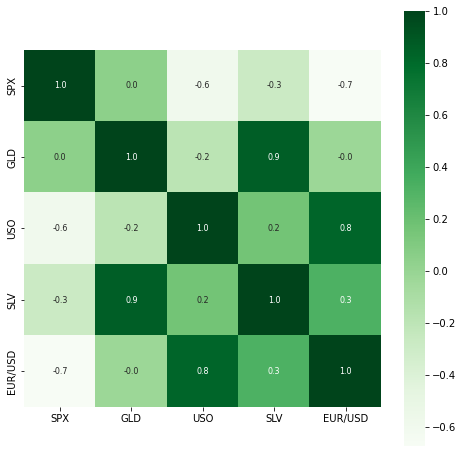

In [ ]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Greens')

1. cbar = shows the color range with value
2. square = mentions the show of square shapes in the heat table
3. fmt = no. of decimal after integer part
4. annot = annotations
5. annot_kws = annotation size
6. cmap = color for heat map

1. +ve shows positive correlation
2. -ve shows negative correlation

In [ ]:
# correlation values of GOLD with other asserts
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


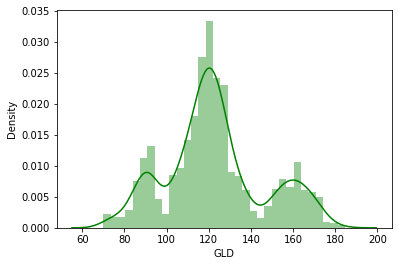

In [ ]:
# checking the distribution of the GOLD Price
sns.distplot(gold_data['GLD'],color='green')

1. It shows majority price lies in the range of 120.
2. Splitting the data and using asserts data to feed in ML alog to predict values( i.e. removing date column)

#Splitting the Features and Target

In [ ]:
X = gold_data.drop(['Date','GLD'],axis=1)
# no need of date column and gold price column becoz 
# we saw that other stocks/assets prices are correlated
# with gold price

Y = gold_data['GLD']

In [ ]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [ ]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting data into Training data and Test Data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)
# test_size = 0.2 means 20% of the data will be used as test data and rest as training data

Model Training:
Random Forest Regressor

In [ ]:
regressor = RandomForestRegressor(n_estimators=100)

In [ ]:
# training the model
regressor.fit(X_train,Y_train)
# fit() will feed in our training data

RandomForestRegressor()

Model Evaluation

In [ ]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [ ]:
print(test_data_prediction)

[168.76709947  81.87869985 116.18969989 127.61670047 120.69150112
 154.79949706 150.42179895 126.1844002  117.60509906 126.04520055
 116.67890127 171.96550061 141.63319936 167.87719847 115.21599972
 117.95960044 140.04230333 170.20130136 159.23890266 160.86599937
 154.9539002  125.25410064 176.06069924 157.22060381 125.25210033
  93.68509981  77.80069998 120.63000025 119.11659955 167.44090068
  88.2940001  125.27519986  91.231801   117.60530056 121.16089916
 136.1626014  115.41930103 115.09850033 147.10479935 107.36690088
 104.20410249  87.16739797 126.51890025 118.03650028 152.85799882
 119.54070025 108.27469991 107.85839793  93.15120027 127.1086975
  75.00720011 113.67899943 121.33650006 111.28169915 118.81769868
 120.53859991 159.44750039 167.27270142 147.1952971   85.96719902
  94.2951004   86.82009924  90.5965005  118.94120083 126.48240113
 127.57609954 169.70249932 122.38889947 117.30919861  98.48220044
 168.21610066 143.01119804 132.40350261 121.18640258 120.66969934
 119.890100

In [ ]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9894220690567483


in the above predicted test_data_prediction range is huge(120-150) so an accuracy of **98.87%** is very good i.e. our model is working correctly to predict gold price with an accuracy of **98.87%**.

The R squared value lies between 0 and 1 where 0 indicates that this model doesn't fit the given data and 1 indicates that the model fits perfectly to the dataset provided.

**Comparing the Actual Values and Predicted Values in a Plot**

In [ ]:
Y_test = list(Y_test)
# converting pandas series value to list for ease in plotting

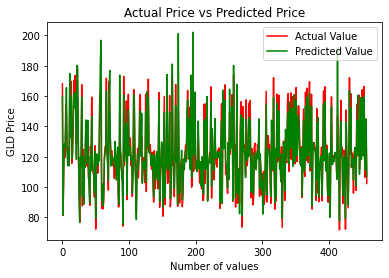

In [ ]:
plt.plot(Y_test, color='red', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()